## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")


## Exploratory data analysis

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Shape of the data
df.shape

(284807, 31)

In [ ]:
#observe the different feature type present in the data
print(df.dtypes)
print(df.info())

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      

In [ ]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,Amount,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can see that there are no missing values in the dataset

### Outliers treatment
As the whole dataset is PCA transformed, the outliers are already treated. Hence, we are not performing any outliers treatment on the dataframe.

Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(classes, normal_share, fraud_share)

0    284315
1       492
Name: Class, dtype: int64 99.82725143693798 0.1727485630620034


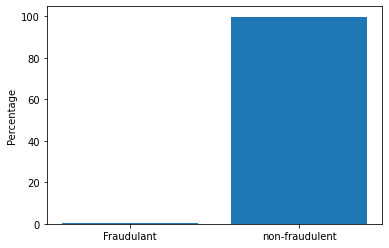

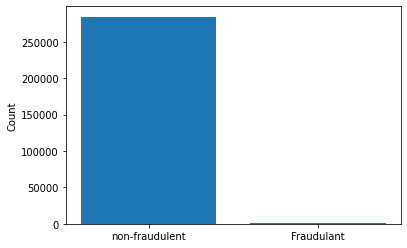

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.bar(['Fraudulant','non-fraudulent'], [fraud_share,normal_share] )
plt.ylabel("Percentage")
plt.show()
plt.bar(['non-fraudulent','Fraudulant'], classes )
plt.ylabel("Count")
plt.show()

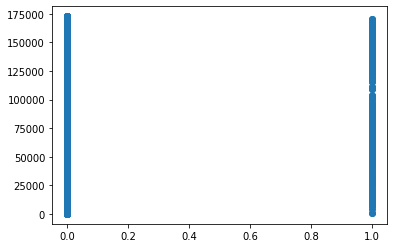

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
plt.scatter(df.Class, df.Time)

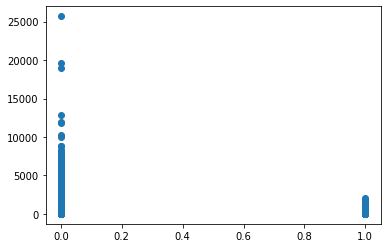

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(df.Class, df.Amount)


In [ ]:
# Drop unnecessary columns
# Dropping Time column as this feature is not going to help in the model building.
df = df.drop("Time", axis = 1)

### Splitting the data into train & test data

In [ ]:
X = df.drop('Class', axis=1)
y = df.Class

In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.2)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
390
102


## Feature Scaling using Standard Scaler
We need to scale Amount column.

In [ ]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = StandardScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [ ]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
40953,1.243706,-0.150129,0.721725,0.118769,-0.982132,-0.956552,-0.360817,-0.049779,0.586917,-0.131698,-0.461098,-0.485099,-1.177054,0.350145,1.422900,0.601079,-0.342629,-0.261161,-0.032116,-0.127432,-0.204131,-0.685994,0.162416,0.375916,-0.038459,0.792646,-0.072751,0.013447,-0.295305
244715,1.999540,-0.224942,-3.139755,-0.340136,2.593632,3.287918,-0.549756,0.831435,0.676736,-0.657896,0.179527,0.089134,-0.388154,-1.489187,0.001694,0.045010,1.158154,0.061888,-0.249538,-0.089282,-0.029166,0.092672,0.068897,0.632085,0.122301,0.658652,-0.023623,-0.035130,-0.294784
102774,-0.876925,0.991462,0.976029,0.010646,-0.294396,-0.516754,0.252559,0.534901,-0.360959,-0.524786,-0.592797,-0.397796,-0.964107,0.705686,1.118728,0.031259,0.089970,-0.439006,-0.435291,-0.038626,0.055200,0.044527,0.109453,0.051629,-0.524753,0.205931,0.230684,0.135773,-0.224265
39667,1.258686,-0.702411,-0.170401,-0.640919,-0.784163,-0.930511,-0.202681,-0.116526,-0.796725,0.638624,-0.321513,-1.662479,-2.202971,0.608616,0.961509,0.670960,0.809503,-2.061361,0.428551,0.024249,-0.101266,-0.652188,0.067763,-0.003386,0.274650,-0.420814,-0.034208,0.014249,-0.024162
195314,2.214460,-0.710049,-1.264823,-0.877729,-0.633657,-1.310064,-0.372159,-0.388195,-0.485909,0.869561,-0.609216,-0.632636,0.168140,0.012228,0.413809,0.868142,0.180896,-1.336773,0.337529,-0.041061,0.451040,1.333205,-0.009228,0.022817,0.176406,0.080198,-0.032751,-0.065320,-0.296346


In [ ]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
282959,-0.954786,-0.765147,0.175022,-2.155618,2.154228,3.901647,-0.603161,1.187493,-1.020381,0.154472,-0.482831,-0.311706,0.116006,-0.125666,0.470325,-1.213290,-0.409872,1.085712,-1.105347,0.053373,-0.463251,-1.157364,0.386428,0.621950,-0.363641,0.037404,0.336690,0.212247,0.047998
247725,-0.790890,-0.572161,2.279695,-1.893871,-0.448882,0.955087,-0.895449,0.240219,0.272210,0.348290,-0.115148,-0.585516,-0.870560,-1.345029,-1.748090,1.152137,0.001661,-0.478232,1.239096,0.012487,0.098156,0.438062,-0.460434,0.368487,0.487330,-0.147177,-0.566619,-0.243925,-0.334388
104676,-1.117643,1.221003,1.500720,-0.524995,0.355423,-1.099606,0.927889,-0.243784,-0.378425,-0.629580,-0.165319,0.249336,0.714873,-0.726255,0.366809,0.587292,-0.377804,-0.333224,-0.843402,-0.089955,-0.237188,-0.630085,-0.222897,0.356586,-0.112567,-0.147726,-0.656645,-0.450991,-0.348844
36715,0.938707,-0.073768,1.262434,2.711881,-0.694834,0.406251,-0.391960,0.136842,0.061780,0.431070,-1.206566,0.264169,0.520186,-0.490555,-0.306649,0.721510,-0.565401,-0.109498,-0.744515,0.098018,-0.038799,-0.186149,-0.100430,0.043335,0.318809,-0.034418,0.024230,0.052159,0.089405
71566,1.016028,-0.075405,1.192140,1.118991,-0.670351,0.380004,-0.611617,0.280045,0.129963,0.096322,1.555126,1.225027,0.574284,0.098995,0.906667,0.561596,-0.708628,0.323626,-0.786981,-0.028223,0.211747,0.583608,-0.029316,0.020790,0.238789,-0.354293,0.070876,0.034724,-0.172207


### Plotting the distribution of a variable

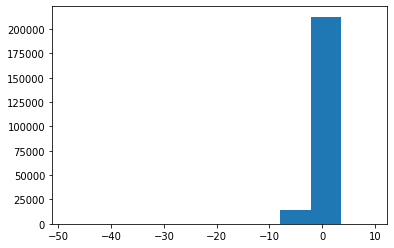

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
plt.hist(X_train.V3)
plt.show()

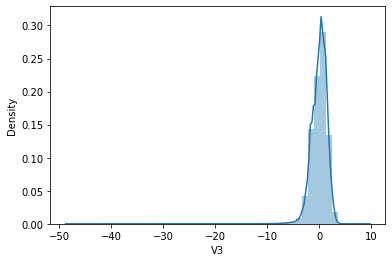

In [ ]:
sns.distplot(X_train.V3)

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt =  preprocessing.PowerTransformer(copy=False)

# Fitting the power transformer in train data
skewed = X_train.columns
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

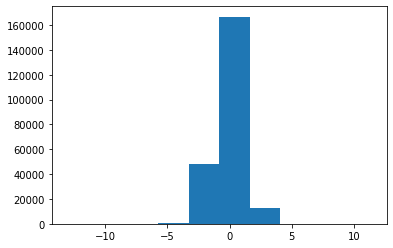

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 
plt.hist(X_train.V3)
plt.show()

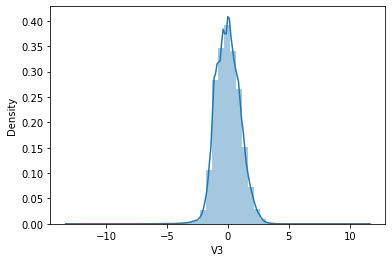

In [ ]:
sns.distplot(X_train.V3)

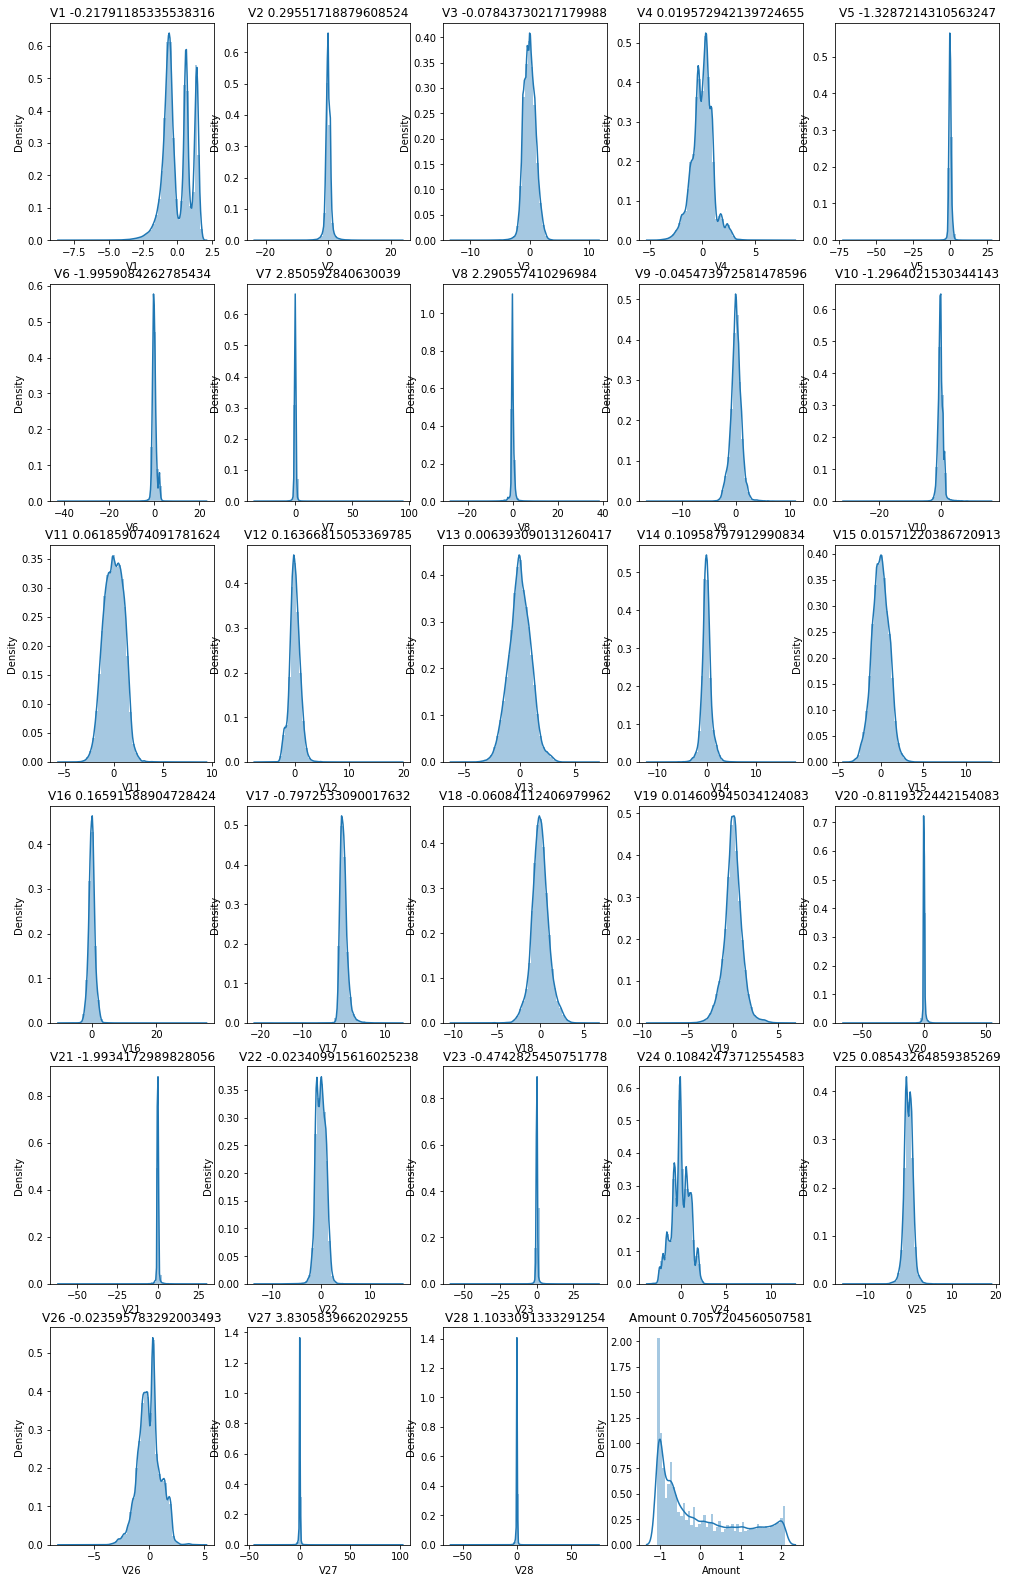

In [ ]:
# Plotting the distribution of the variables (skewness) of all the columns
cols = X_train.columns
cols

k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

# Model Building on Imbalanced data


## 1. Logistic Regression

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
cv_num =  KFold(n_splits=5, shuffle=True, random_state=4)

In [ ]:
#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

In [ ]:
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = num_C, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   15.2s finished


Best ROC AUC score:  0.9838308030278553
Best hyperparameters:  {'C': 0.01}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.253262,0.042509,0.029308,0.001881,0.01,{'C': 0.01},0.993084,0.981124,0.990104,0.988663,0.966179,0.983831,0.009667,1,0.983993,0.986372,0.984455,0.984377,0.989096,0.985659,0.001907
1,1.665186,0.049416,0.028037,0.001005,0.1,{'C': 0.1},0.993189,0.978963,0.983517,0.990583,0.967781,0.982807,0.009048,2,0.983418,0.986308,0.985128,0.983472,0.987870,0.985239,0.001704
2,1.823500,0.132282,0.029473,0.001974,1,{'C': 1},0.992781,0.978277,0.981749,0.990713,0.967854,0.982275,0.009009,3,0.982956,0.985984,0.984968,0.982987,0.987316,0.984842,0.001699
3,1.789795,0.153046,0.029823,0.003341,10,{'C': 10},0.992715,0.978200,0.981541,0.990728,0.967859,0.982209,0.009004,4,0.982894,0.985943,0.984940,0.982924,0.987242,0.984789,0.001699
4,1.775078,0.148439,0.027879,0.000437,100,{'C': 100},0.992707,0.978193,0.981526,0.990728,0.967859,0.982203,0.009003,5,0.982888,0.985938,0.984937,0.982919,0.987236,0.984784,0.001700
5,1.598802,0.380193,0.024914,0.006756,1000,{'C': 1000},0.992706,0.978192,0.981523,0.990728,0.967859,0.982202,0.009003,6,0.982888,0.985938,0.984936,0.982918,0.987235,0.984783,0.001700


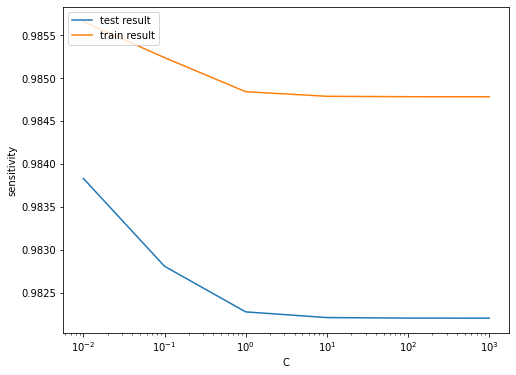

In [ ]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Instantiating the model with best C
log_reg_imb_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227415     30]
 [   159    241]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))


Accuracy:- 0.9991704887094297
Sensitivity:- 0.6025
Specificity:- 0.999868099980215
F1-Score:- 0.7183308494783905


In [ ]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [ ]:
# Predictions on the train set
display_scores(y_train, y_train_pred)

F1 Score: 71.83%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227445
           1       0.89      0.60      0.72       400

    accuracy                           1.00    227845
   macro avg       0.94      0.80      0.86    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

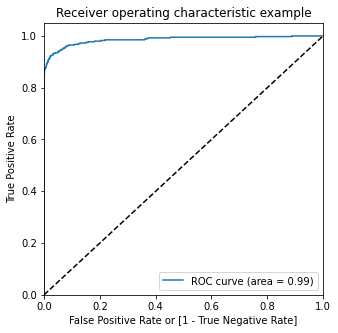

In [ ]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [ ]:
# Prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56865     5]
 [   37    55]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9992626663389628
Sensitivity:- 0.5978260869565217
Specificity:- 0.9999120801828733
F1-Score:- 0.7236842105263157


In [ ]:
# Making prediction on the test set
display_scores(y_test, y_test_pred)

F1 Score: 72.37%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.92      0.60      0.72        92

    accuracy                           1.00     56962
   macro avg       0.96      0.80      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

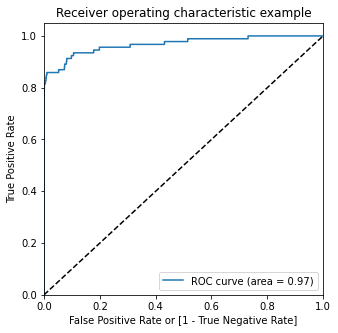

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### **Model summary**

**Best hyperparameters**
```
{'C': 0.01}
```

**Train set**
- Accuracy: 0.99
- Sensitivity: 0.61
- Specificity: 0.99
- F1-Score: 0.72
- ROC = 0.99



**Test set**
- Accuracy: 0.99
- Sensitivity: 0.60
- Specificity: 0.99
- F1-Score: 0.72
- ROC = 0.97

Overall, the model is performing well in the test set, what it had learnt from the train set.

<br><br><br>
## 2. Decision Tree

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   45.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.102017,0.007381,0.039455,0.001202,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.932374,0.922515,0.964767,0.939885,0.018049,7
1,5.114273,0.012170,0.041638,0.002590,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.932374,0.915016,0.964767,0.937386,0.020618,8
2,5.110187,0.025380,0.041252,0.001317,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.947883,0.922339,0.964622,0.944948,0.017386,5
3,5.079060,0.014966,0.040836,0.000709,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.947883,0.914666,0.964622,0.942390,0.020761,6
4,9.997970,0.035766,0.044870,0.000959,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.948545,0.916347,0.971825,0.945573,0.022746,4
5,9.941027,0.051335,0.045889,0.002294,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.948543,0.931123,0.971842,0.950503,0.016681,1
6,9.877328,0.027783,0.042512,0.005675,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.951674,0.925891,0.962349,0.946638,0.015304,3
7,9.822116,0.055817,0.031526,0.005934,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.951697,0.925898,0.967062,0.948219,0.016984,2


In [ ]:

# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)


Best roc_auc:- 0.9505025912275227
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
#print the optimum value of hyperparameters
print('Best hyperparameters: ', grid_search.best_params_)

Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [ ]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

Prediction on train set

In [ ]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)


# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227445      0]
 [     0    400]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9994074919353069
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.8111888111888111


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227445
           1       0.92      0.72      0.81       400

    accuracy                           1.00    227845
   macro avg       0.96      0.86      0.91    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9549076699861504

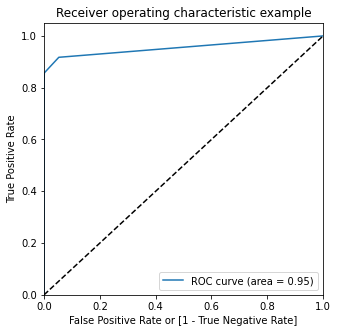

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

Prediction on test data

In [ ]:
# Prediction on the test data
y_test_pred = dt_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56860    10]
 [   33    59]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

Accuracy: 0.9992451107756047
Sensitivity: 0.6413043478260869
Specificity: 0.9998241603657464
F1-Score: 0.8111888111888111


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.86      0.64      0.73        92

    accuracy                           1.00     56962
   macro avg       0.93      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9293428567059885

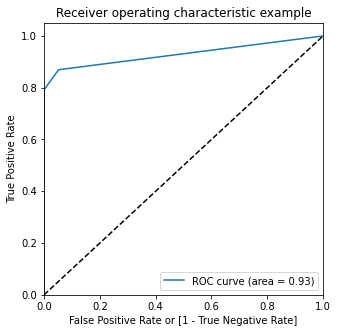

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### **Model Summary**

**Best Estimator**


```
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
```

**Best Parameters**

```
{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}
```

**Train Set**
- Accuracy: 0.99
- Sensitivity: 1.0
- Specificity: 1.0
- F1-Score: 0.76
- ROC-AUC: 0.96

**Test Set**
- Accuracy: 0.99
- Sensitivity: 0.64
- Specificity: 0.99
- F1-Score: 0.76
- ROC-AUC: 0.92


<br><br><br><br>
## 3. Random Forest

In [ ]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 50.5min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9991792668956117 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 300}


In [ ]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [ ]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227445      0]
 [     0    400]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

Accuracy: 0.9992802124251136
Sensitivity: 1.0
Specificity: 1.0
F1-Score: 0.7824933687002653


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227445
           1       0.83      0.74      0.78       400

    accuracy                           1.00    227845
   macro avg       0.92      0.87      0.89    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9820269185957043

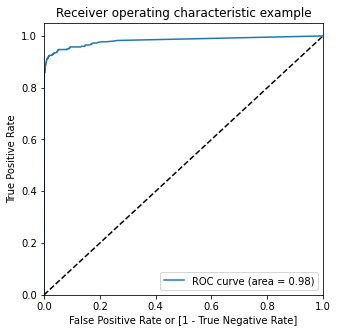

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56856    14]
 [   24    68]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

Accuracy: 0.9993328885923949
Sensitivity: 0.7391304347826086
Specificity: 0.999753824512045
F1-Score: 0.7824933687002653


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.83      0.74      0.78        92

    accuracy                           1.00     56962
   macro avg       0.91      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9586796928158042

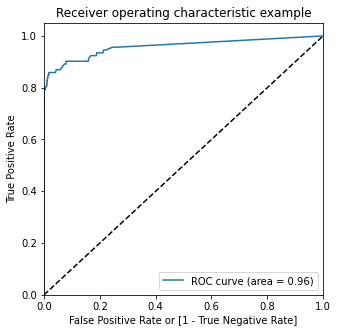

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### **Model Summary**

Best Parameters

```
{'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 300}
```

**Train set**
- Accuracy: 0.99
- Sensitivity: 1.0
- Specificity: 1.0
- F1-Score: 0.78
- ROC: 0.98

**Test set**
- Accuracy: 0.99
- Sensitivity: 0.73
- Specificity: 0.99
- F1-Score: 0.78
- ROC: 0.96



<br><br><br><br>
## 4. XGboost

In [ ]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 17.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,48.507653,1.791088,0.468052,0.009831,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.965871,0.970367,0.981723,0.972654,0.006671,2,0.999739,0.999955,0.999834,0.999843,0.000089
1,59.052229,0.291818,0.463575,0.002156,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.967323,0.978550,0.979468,0.975114,0.005521,1,0.999963,0.999988,0.999857,0.999936,0.000057
2,62.766934,0.251688,0.452051,0.014969,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.968467,0.970813,0.978146,0.972475,0.004123,3,0.999935,0.999969,0.999908,0.999937,0.000025
3,44.639004,0.666581,0.468223,0.001158,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.959373,0.951537,0.945269,0.952060,0.005770,6,0.999989,0.999994,0.999999,0.999994,0.000004
4,57.029796,0.658817,0.475743,0.003183,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.967375,0.953249,0.980709,0.967111,0.011212,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,61.085136,0.598244,0.465139,0.003022,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.968784,0.964507,0.977109,0.970133,0.005233,4,1.000000,1.000000,1.000000,1.000000,0.000000


In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print("Best estimator:","\n",model_cv.best_estimator_)
print("Best Parameter:",model_cv.best_params_)

Best roc auc score :  0.97511364007651
Best estimator: 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)
Best Parameter: {'learning_rate': 0.2, 'subsample': 0.6}


In [ ]:
# model with the best hyperparameters

params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

Model evaluation on train set

In [ ]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227460     12]
 [    66    307]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9996576620070662
Sensitivity:- 0.8230563002680965
Specificity:- 0.9999472462544841
F1-Score:- 0.8872832369942195


In [ ]:
# Predictions on the train set

display_scores(y_train, y_train_pred)

F1 Score: 88.73%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227472
           1       0.96      0.82      0.89       373

    accuracy                           1.00    227845
   macro avg       0.98      0.91      0.94    227845
weighted avg       1.00      1.00      1.00    227845



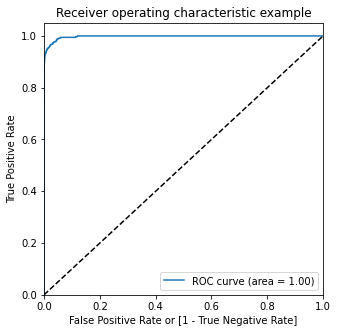

In [ ]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

Evaluating the model on the test set¶

In [ ]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56840     3]
 [   21    98]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9995786664794073
Sensitivity:- 0.8235294117647058
Specificity:- 0.9999472230529705
F1-Score:- 0.8909090909090909


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56843
           1       0.97      0.82      0.89       119

    accuracy                           1.00     56962
   macro avg       0.98      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962



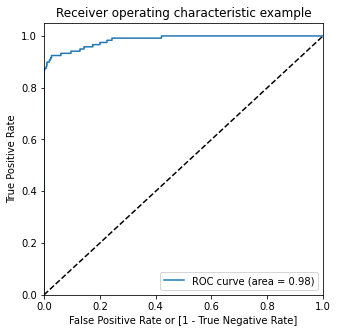

In [ ]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## **Model Summary**

**Best Estimator:**
 ```
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)
```

**Best Parameter:** 
````
{'learning_rate': 0.2, 'subsample': 0.6}
````

**Train set**
- Accuracy: 0.99
- Sensitivity: 0.85
- Specificity: 0.99
- F1-Score: 0.90
- ROC: 1.0

**Test Set**
- Accuracy: 0.99
- Sensitivity: 0.75
- Specificity: 0.99
- F1-Score: 0.81
- ROC: 0.98




### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

### From all the other models we can see that the XGBoost is the best performing Model with ROC of 1.0 in Train set and 0.98 in Test set.

In [ ]:
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic'}


clf = XGBClassifier(params = params)  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)

# Predicted probability
y_test_pred_proba = clf.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba) #print the evaluation score on the X_test by choosing the best evaluation metric

Top var = 17
2nd Top var = 14
3rd Top var = 10


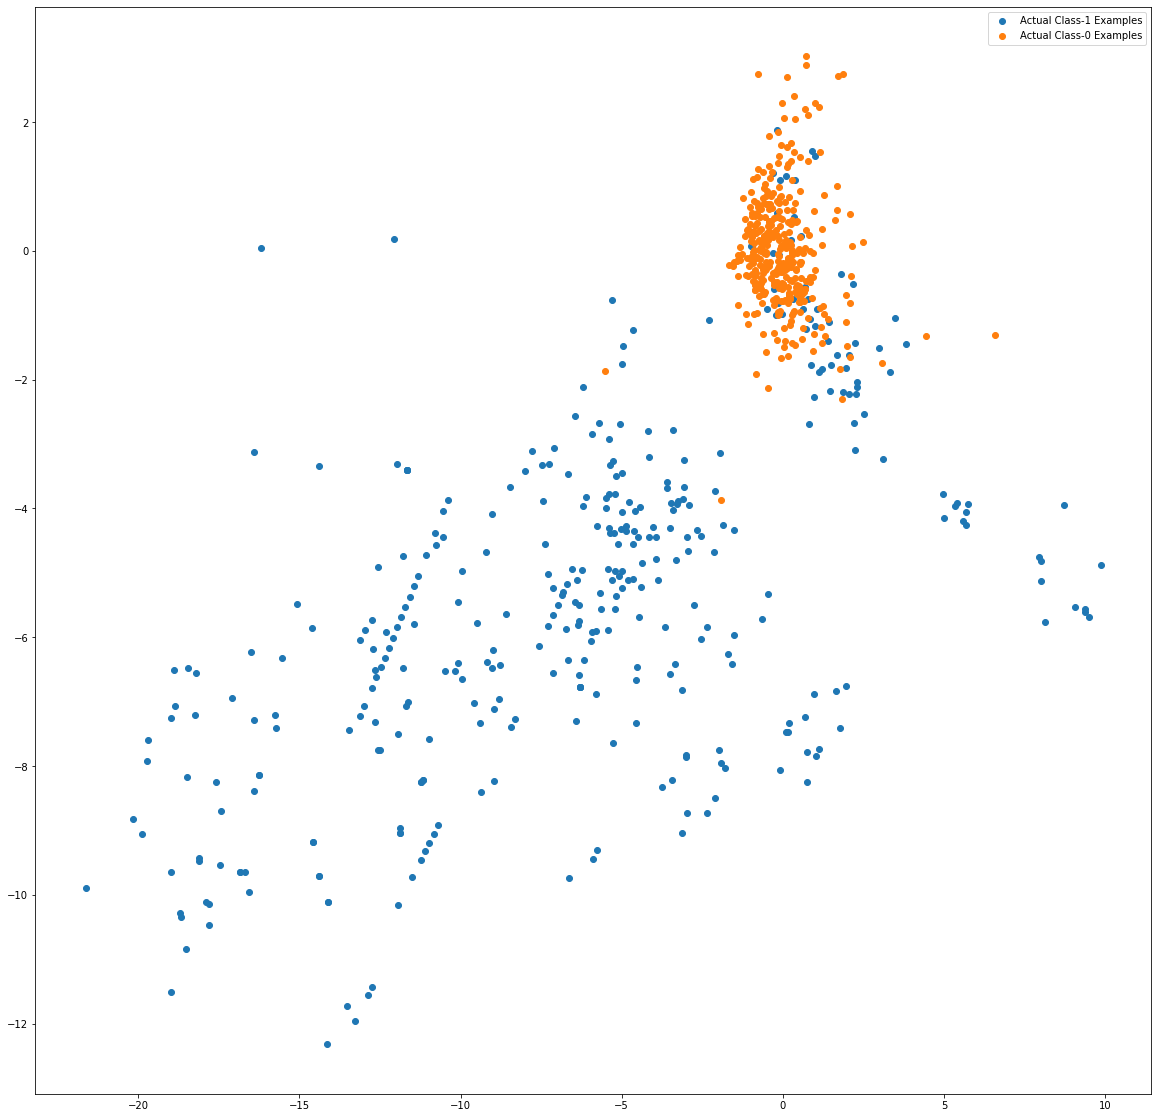

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

<br><br><br><br><br><br>
# **Model building with balancing Classes**

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

# **Random Oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling:',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_over))

Before sampling: Counter({0: 227447, 1: 398})
New class distribution:- Counter({0: 227447, 1: 227447})


## Model Building
- Build different models on the balanced dataset and see the result 

## 1. Logistic Regression

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
cv_num =  KFold(n_splits=5, shuffle=True, random_state=4)

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = num_C, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_over, y_train_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.2min finished


Best ROC AUC score:  0.9861295964432447
Best hyperparameters:  {'C': 10}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.170975,0.120979,0.051974,0.000908,0.01,{'C': 0.01},0.985866,0.985816,0.986708,0.986548,0.985556,0.986099,0.000448,6,0.986164,0.986166,0.985913,0.986071,0.986268,0.986116,0.000119
1,2.288305,0.066832,0.051834,0.000664,0.1,{'C': 0.1},0.985888,0.985841,0.986744,0.986599,0.985564,0.986127,0.000460,5,0.986193,0.986195,0.985938,0.986098,0.986294,0.986144,0.000120
2,2.262093,0.103944,0.051389,0.000433,1,{'C': 1},0.985890,0.985843,0.986745,0.986605,0.985564,0.986130,0.000461,4,0.986194,0.986196,0.985942,0.986102,0.986297,0.986146,0.000120
3,2.257500,0.071847,0.051429,0.000304,10,{'C': 10},0.985890,0.985843,0.986746,0.986605,0.985563,0.986130,0.000462,1,0.986195,0.986197,0.985942,0.986102,0.986297,0.986147,0.000120
4,2.245763,0.082761,0.051256,0.000581,100,{'C': 100},0.985890,0.985842,0.986746,0.986606,0.985563,0.986130,0.000462,3,0.986195,0.986197,0.985942,0.986102,0.986297,0.986147,0.000120
5,2.216942,0.061861,0.051810,0.000233,1000,{'C': 1000},0.985890,0.985842,0.986746,0.986606,0.985563,0.986130,0.000462,2,0.986195,0.986197,0.985942,0.986102,0.986297,0.986147,0.000120


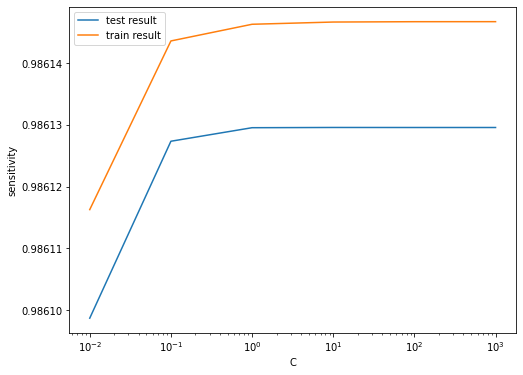

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
model_cv.best_params_

{'C': 10}

In [ ]:
# Model with best parameters

# Instantiating the model
logreg_over = LogisticRegression(C=10)

# Fitting the model with train data
logreg_over_model = logreg_over.fit(X_train_over, y_train_over)

Evaluating on Train set

In [ ]:
# Predictions on the train set
y_train_pred = logreg_over_model.predict(X_train_over)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_over, y_train_pred)
print(confusion)

[[221882   5557]
 [ 18594 208845]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_over, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_over, y_train_pred))

Accuracy:- 0.9469066430999081
Sensitivity:- 0.9182462110719798
Specificity:- 0.9755670751278365
F1-Score:- 0.9453400657702657


In [ ]:
# Printing scores
display_scores(y_train_over, y_train_pred)

F1 Score: 94.53%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95    227439
           1       0.97      0.92      0.95    227439

    accuracy                           0.95    454878
   macro avg       0.95      0.95      0.95    454878
weighted avg       0.95      0.95      0.95    454878



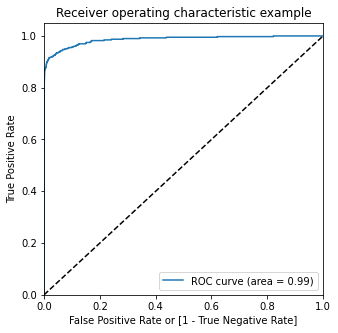

In [ ]:
# Predicted probability
y_train_pred_proba = logreg_over_model.predict_proba(X_train_over)[:,1]
# Plot the ROC curve
draw_roc(y_train_over, y_train_pred_proba)

Evaluation on test set

In [ ]:
# Prediction on the test set
y_test_pred = logreg_over_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55479  1397]
 [    6    80]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9753695446086865
Sensitivity:- 0.9302325581395349
Specificity:- 0.9754377945003164
F1-Score:- 0.10236724248240564


In [ ]:
# Printing the scores
display_scores(y_test, y_test_pred)

F1 Score: 10.24%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56876
           1       0.05      0.93      0.10        86

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.98      0.99     56962



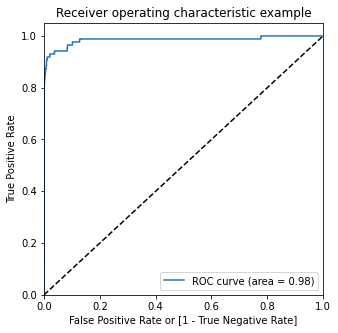

In [ ]:
# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### **Model Summary**

Best Parameters:
```
{'C': 10}
```

**Train Set**
- Accuracy: 0.94
- Sensitivity: 0.91
- Specificity: 0.97
- F1-Score: 0.94
- ROC: 0.99

**Test Set**
- Accuracy: 0.97
- Sensitivity: 0.93
- Specificity: 0.97
- F1-Score: 0.10
- ROC: 0.98


<br><br><br><br><br>

## 2. Decision Tree


In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_over,y_train_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   57.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [ ]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9995194053932615
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [ ]:
# Model with best Parameters

dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_over_model.fit(X_train_over, y_train_over)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

Model Evaluation on Train set

In [ ]:
# Predictions on the train set
y_train_pred = dt_over_model.predict(X_train_over)

In [ ]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_over, y_train_pred)
confusion

array([[225809,   1630],
       [     0, 227439]])

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_over, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_over, y_train_pred))

Accuracy:- 0.9964166215996377
Sensitivity:- 1.0
Specificity:- 0.9928332431992755
F1-Score:- 0.9964294163519588


In [ ]:
# classification_report
print(classification_report(y_train_over, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227439
           1       0.99      1.00      1.00    227439

    accuracy                           1.00    454878
   macro avg       1.00      1.00      1.00    454878
weighted avg       1.00      1.00      1.00    454878



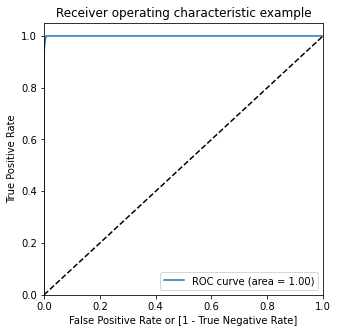

In [ ]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_train_over)[:,1]

# Plot the ROC curve
draw_roc(y_train_over, y_train_pred_proba)

Model Evaluation on Test set

In [ ]:
# Predictions on the test set
y_test_pred = dt_over_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56454   422]
 [   13    73]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9923633299392578
Sensitivity:- 0.8488372093023255
Specificity:- 0.9925803502356002
F1-Score:- 0.2512908777969019


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56876
           1       0.15      0.85      0.25        86

    accuracy                           0.99     56962
   macro avg       0.57      0.92      0.62     56962
weighted avg       1.00      0.99      1.00     56962



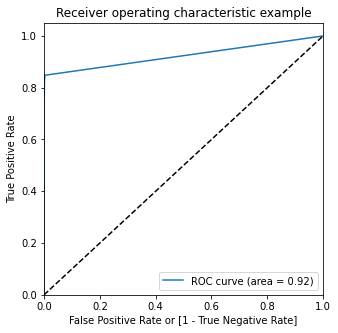

In [ ]:
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### **Model Summary**

Best Hyperparameters:
```
{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}
```

**Train set**
- Accuracy: 0.99
- Sensitivity: 1.0
- Specificity: 0.99
- F1-Score: 0.99
- ROC: 1.0

**Test set**
- Accuracy: 0.99
- Sensitivity: 0.84
- Specificity: 0.99
- F1-Score: 0.25
- ROC: 0.92


<br><br><br><br><br>

## 3. Random Forest

In [ ]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_over, y_train_over)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 74.5min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# printing the optimal accuracy score and hyperparameters
print("ROC Score:",grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

ROC Score: 0.9941720557630751
Best Parameters: {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 300}


In [ ]:
# model with the best hyperparameters

rfc_over_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [ ]:
# Fit the model
rfc_over_model.fit(X_train_over, y_train_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Model Evaluation on Train set

In [ ]:
# Predictions on the train set
y_train_pred = rfc_over_model.predict(X_train_over)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_over, y_train_pred)
print(confusion)

[[226087   1362]
 [ 12035 215414]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_over, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_over, y_train_pred))

Accuracy:- 0.9705494418528989
Sensitivity:- 0.9470870392923249
Specificity:- 0.9940118444134729
F1-Score:- 0.9698418594180876


In [ ]:
# classification_report
print(classification_report(y_train_over, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    227449
           1       0.99      0.95      0.97    227449

    accuracy                           0.97    454898
   macro avg       0.97      0.97      0.97    454898
weighted avg       0.97      0.97      0.97    454898



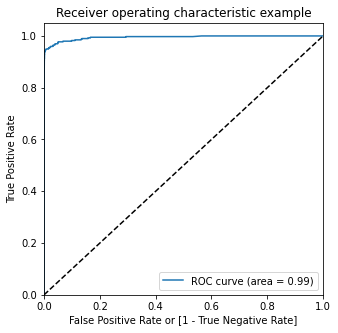

In [ ]:
# Predicted probability
y_train_pred_proba = rfc_over_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

Model Evaluation on Test set

In [ ]:
# Predictions on the test set
y_test_pred = rfc_over_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56471   395]
 [   13    83]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9928373301499245
Sensitivity:- 0.8645833333333334
Specificity:- 0.9930538458833046
F1-Score:- 0.28919860627177696


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.17      0.86      0.29        96

    accuracy                           0.99     56962
   macro avg       0.59      0.93      0.64     56962
weighted avg       1.00      0.99      1.00     56962



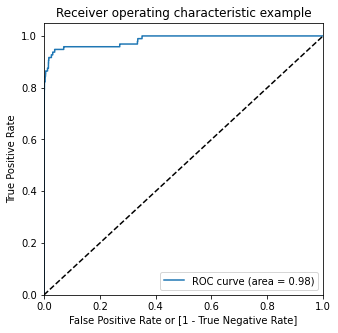

In [ ]:
# Predicted probability
y_test_pred_proba = rfc_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### **Model Summary**

Best Hyperparamaters:
```
{'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 300}
```

**Train Set**
- Accuracy:- 0.97
- Sensitivity:- 0.95
- Specificity:- 0.99
- F1-Score:- 0.97
- ROC: 0.99

**Test Set**
- Accuracy:- 0.99
- Sensitivity:- 0.81
- Specificity:- 0.99
- F1-Score:- 0.37
- ROC: 0.97

<br><br><br><br><br><br>

## 4. XGBoost

In [ ]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_over, y_train_over)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 25.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,74.963501,1.347305,0.788642,0.001213,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999928,0.999907,0.999829,0.999888,0.000043,6,0.999897,0.999901,0.999925,0.999908,1.218590e-05
1,88.485941,0.675221,0.790196,0.012477,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999939,0.999910,0.999826,0.999892,0.000048,4,0.999907,0.999890,0.999922,0.999906,1.284051e-05
2,87.991687,0.915987,0.797367,0.010490,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999931,0.999920,0.999821,0.999891,0.000049,5,0.999898,0.999918,0.999928,0.999915,1.247843e-05
3,69.942694,0.690730,0.795747,0.005183,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999976,0.999983,0.999916,0.999958,0.000030,3,0.999996,0.999997,0.999996,0.999996,4.529655e-07
4,82.580117,0.344786,0.799480,0.005546,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999984,0.999971,0.999940,0.999965,0.000018,2,0.999998,0.999997,0.999996,0.999997,5.703465e-07
5,82.980579,0.453240,0.797796,0.001981,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999976,0.999978,0.999947,0.999967,0.000014,1,1.000000,0.999998,0.999999,0.999999,9.090304e-07


In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999668216236232
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)


In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [ ]:
# Model with best hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_over_model = XGBClassifier(params = params)
xgb_over_model.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

Model Evaluation on Train set

In [ ]:
# Predictions on the train set
y_train_pred = xgb_over_model.predict(X_train_over)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_over, y_train_pred)
print(confusion)

[[226007   1440]
 [  1140 226307]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_over, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_over, y_train_pred))


Accuracy:- 0.99432834902197
Sensitivity:- 0.9949878433217408
Specificity:- 0.993668854722199
F1-Score:- 0.9943320869782993


In [ ]:
# classification_report
print(classification_report(y_train_over, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    227447
           1       0.99      0.99      0.99    227447

    accuracy                           0.99    454894
   macro avg       0.99      0.99      0.99    454894
weighted avg       0.99      0.99      0.99    454894



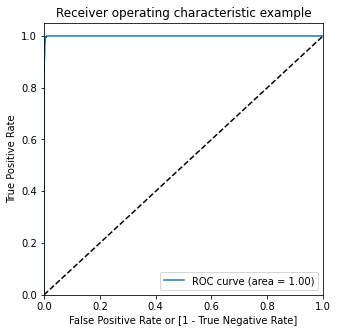

In [ ]:
# Predicted probability
y_train_pred_proba = xgb_over_model.predict_proba(X_train_over)[:,1]

# Plot the ROC curve
draw_roc(y_train_over, y_train_pred_proba)

Model Evaluation on Test Set

In [ ]:
# Predictions on the test set
# There wassome error while testing directly using the X_test, which is a dataframe. So, tried with X_test.values and its working fine
y_test_pred = xgb_over_model.predict(X_test.values)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56491   377]
 [   10    84]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 Score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9932059969804431
Sensitivity:- 0.8936170212765957
Specificity:- 0.9933706126468312
F1-Score:- 0.3027027027027027


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56868
           1       0.18      0.89      0.30        94

    accuracy                           0.99     56962
   macro avg       0.59      0.94      0.65     56962
weighted avg       1.00      0.99      1.00     56962



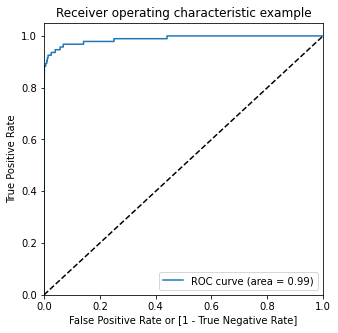

In [ ]:
# Predicted probability
y_test_pred_proba = xgb_over_model.predict_proba(X_test.values)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### **Model Summary**

Best hyperparameters:

```
{'learning_rate': 0.6, 'subsample': 0.9}
```

**Train Set**
- Accuracy:- 0.99
- Sensitivity:- 0.99
- Specificity:- 0.99
- F1-Score:- 0.99
- ROC - 1.00

**Test Set**
- Accuracy:- 0.99
- Sensitivity:- 0.89
- Specificity:- 0.99
- F1-Score:- 0.30
- ROC - 0.99

# **SMOTE**


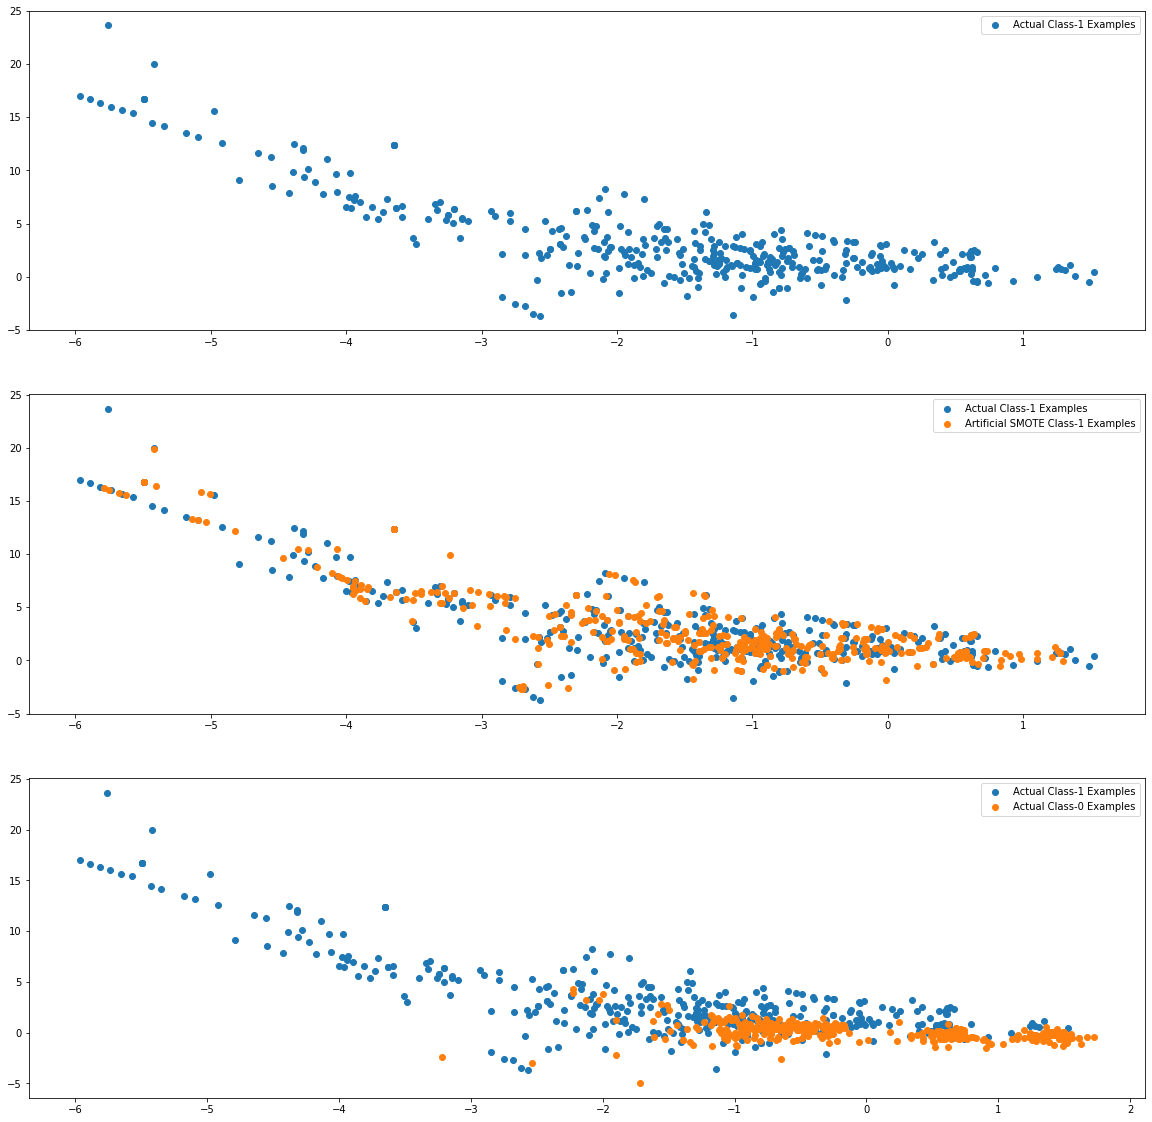

In [ ]:
### Print the class distribution after applying SMOTE 

from imblearn import over_sampling

import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


## **Model Building**

## **1. Logistic Regression**

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.4min finished


Best ROC AUC score:  0.9894884759644125
Best hyperparameters:  {'C': 100}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.329498,0.046041,0.059915,0.004686,0.01,{'C': 0.01},0.989441,0.989812,0.989288,0.989422,0.989373,0.989467,0.000181,6,0.989486,0.989409,0.989540,0.989512,0.989451,0.989480,0.000046
1,2.434056,0.097132,0.056957,0.001372,0.1,{'C': 0.1},0.989460,0.989827,0.989320,0.989432,0.989398,0.989487,0.000176,5,0.989507,0.989434,0.989559,0.989528,0.989471,0.989500,0.000044
2,2.417263,0.037329,0.057375,0.001890,1,{'C': 1},0.989461,0.989828,0.989323,0.989431,0.989399,0.989488,0.000176,4,0.989508,0.989436,0.989560,0.989528,0.989472,0.989501,0.000043
3,2.472239,0.075325,0.056822,0.000385,10,{'C': 10},0.989461,0.989828,0.989323,0.989431,0.989400,0.989488,0.000176,3,0.989508,0.989436,0.989560,0.989528,0.989472,0.989501,0.000043
4,2.455905,0.058988,0.056998,0.000751,100,{'C': 100},0.989461,0.989828,0.989323,0.989431,0.989400,0.989488,0.000176,1,0.989508,0.989436,0.989560,0.989528,0.989472,0.989501,0.000043
5,2.476926,0.065421,0.057083,0.000829,1000,{'C': 1000},0.989461,0.989828,0.989323,0.989431,0.989400,0.989488,0.000176,2,0.989508,0.989436,0.989560,0.989528,0.989472,0.989501,0.000043


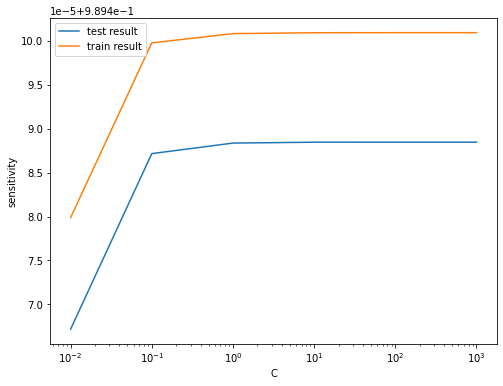

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Printing best params
model_cv.best_params_

{'C': 100}

In [ ]:
# Instantiating the model
logreg_smote_model = LogisticRegression(C=100)

# Fitting the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model Evaluation on Train set

In [ ]:
# Predictions on the train set
y_train_pred = logreg_smote_model.predict(X_train_smote)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[221434   6021]
 [ 17398 210057]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 Score
print("F1 Score:-", f1_score(y_train_smote, y_train_pred) )

Accuracy:- 0.9485194873711283
Sensitivity:- 0.9235101448638192
Specificity:- 0.9735288298784375
F1 Score:- 0.9471989682842088


In [ ]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    227455
           1       0.97      0.92      0.95    227455

    accuracy                           0.95    454910
   macro avg       0.95      0.95      0.95    454910
weighted avg       0.95      0.95      0.95    454910



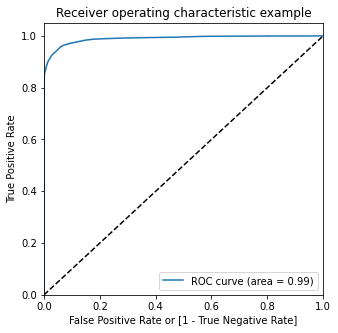

In [ ]:
# Predicted probability
y_train_proba = logreg_smote_model.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve
draw_roc(y_train_smote, y_train_proba)

Model Evaluation on Test data

In [ ]:
# Prediction on the test set
y_test_pred = logreg_smote_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55348  1512]
 [    9    93]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1 Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9732979881324392
Sensitivity:- 0.9117647058823529
Specificity:- 0.9734083714386211
F1 Score:- 0.10896309314586995


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56860
           1       0.06      0.91      0.11       102

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.98     56962



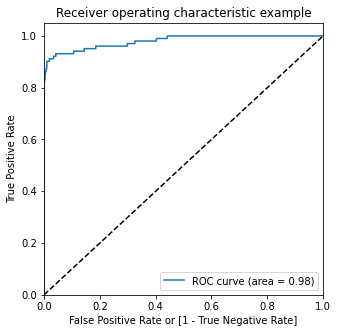

In [ ]:
# Predicted probability
y_test_pred_proba = logreg_smote_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### **Model Summary**

Best Hyperparameters:
```
{'C': 100}
```

**Train Set**
- Accuracy:- 0.95
- Sensitivity:- 0.92
- Specificity:- 0.97
- F1 Score:- 0.95
- ROC : 0.99

**Test Set**
- Accuracy:- 0.97
- Sensitivity:- 0.91
- Specificity:- 0.97
- F1 Score:- 0.11
- ROC : 0.98


<br><br><br><br><br>

## **2. Decision tree**

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  5.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(5, 15, 5),
                       

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,8.931930,0.032225,0.058900,0.000902,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986243,0.986126,0.986201,0.986190,0.000048,7
1,8.959770,0.018503,0.058133,0.000890,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986243,0.986126,0.986201,0.986190,0.000048,7
2,9.046475,0.044575,0.058001,0.000320,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986271,0.986322,0.986191,0.986261,0.000054,5
3,8.985214,0.004593,0.058772,0.000420,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986271,0.986322,0.986191,0.986261,0.000054,5
4,16.786761,0.163123,0.064938,0.000793,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.997976,0.997750,0.997975,0.997901,0.000106,2
5,16.927064,0.121765,0.063067,0.000258,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.997984,0.997766,0.997957,0.997902,0.000097,1
6,16.762785,0.111248,0.064031,0.001024,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997828,0.997678,0.997831,0.997779,0.000072,4
7,16.887542,0.018428,0.063729,0.000818,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997862,0.997697,0.997845,0.997801,0.000074,3


In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Best roc_auc:- 0.99790207329731
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [ ]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

Model Evaluation on Train set

In [ ]:
# Predictions on the train set
y_train_pred = dt_smote_model.predict(X_train_smote)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[224531   2924]
 [  2455 225000]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

#F1 Score
print("F1 Score:-", f1_score(y_train_smote, y_train_pred))

Accuracy:- 0.9881756831021521
Sensitivity:- 0.9892066562616781
Specificity:- 0.987144709942626
F1 Score:- 0.9881878611003142


In [ ]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    227455
           1       0.99      0.99      0.99    227455

    accuracy                           0.99    454910
   macro avg       0.99      0.99      0.99    454910
weighted avg       0.99      0.99      0.99    454910



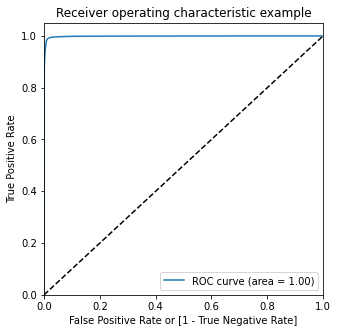

In [ ]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

Model Evaluation on Test set

In [ ]:
# Predictions on the test set
y_test_pred = dt_smote_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56110   750]
 [   15    87]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

#F1 Score
print("F1 Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9865699940311085
Sensitivity:- 0.8529411764705882
Specificity:- 0.9868097080548716
F1 Score:- 0.1853035143769968


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56860
           1       0.10      0.85      0.19       102

    accuracy                           0.99     56962
   macro avg       0.55      0.92      0.59     56962
weighted avg       1.00      0.99      0.99     56962



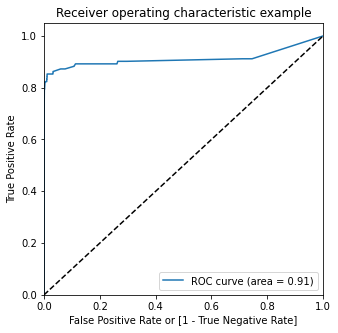

In [ ]:
# Predicted probability
y_test_pred_proba = dt_smote_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### **Model Summary**

Best Hyperparameters:
```
{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}
```

**Train set**
- Accuracy: 0.99
- Sensitivity: 0.99
- Specificity: 0.99
- F1 Score: 0.99
- ROC : 1.00

**Test Set**
- Accuracy: 0.99
- Sensitivity: 0.85
- Specificity: 0.99
- F1 Score: 0.19
- ROC : 0.91

<br><br><br><br><br>

## **3. Random forest**

In [ ]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_smote, y_train_smote)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 132.2min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# printing the optimal accuracy score and hyperparameters
print("ROC Score:",grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

ROC Score: 0.9933013506525816
Best Parameters: {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 100}


In [ ]:
# model with the best hyperparameters

rfc_smote_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=10,
                             n_estimators=100)

In [ ]:
# Fit the model
rfc_smote_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Model Evaluation on Train Set


In [ ]:
# Predictions on the train set
y_train_pred = rfc_smote_model.predict(X_train_smote)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[226246   1209]
 [ 19860 207595]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

#F1 Score
print("F1 Score:-", f1_score(y_train_smote, y_train_pred))

Accuracy:- 0.9536853443538282
Sensitivity:- 0.9126860258073025
Specificity:- 0.994684662900354
F1 Score:- 0.9517052943320367


In [ ]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96    227455
           1       0.99      0.91      0.95    227455

    accuracy                           0.95    454910
   macro avg       0.96      0.95      0.95    454910
weighted avg       0.96      0.95      0.95    454910



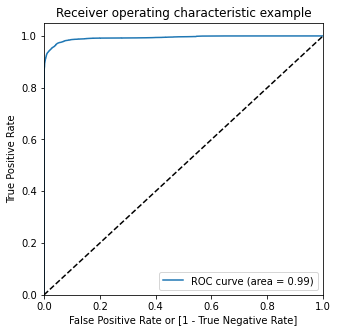

In [ ]:
# Predicted probability
y_train_pred_proba = rfc_smote_model.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

Model Evaluation on Test set

In [ ]:
# Predictions on the test set
y_test_pred = rfc_smote_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56572   288]
 [   15    87]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9946806643025174
Sensitivity:- 0.8529411764705882
Specificity:- 0.9949349278930707
F1-Score:- 0.36477987421383645


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56860
           1       0.23      0.85      0.36       102

    accuracy                           0.99     56962
   macro avg       0.62      0.92      0.68     56962
weighted avg       1.00      0.99      1.00     56962



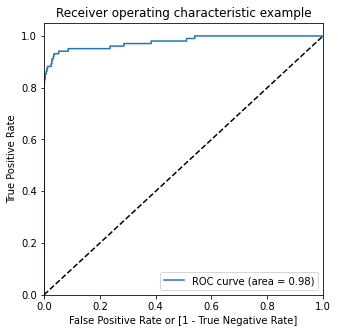

In [ ]:
# Predicted probability
y_test_pred_proba = rfc_smote_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### **Model Summary**

Best Hyperparametrs:
```
{'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 100}
```

**Train Set**
- Accuracy:- 0.95
- Sensitivity:- 0.91
- Specificity:- 0.99
- F1 Score:- 0.95
- ROC: 0.99

**Test Set**
- Accuracy:- 0.99
- Sensitivity:- 0.85
- Specificity:- 0.99
- F1-Score:- 0.36
- ROC: 0.98

<br><br><br><br><br><br>


## **4. XGBoost**

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 29.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [87]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,78.969311,0.139287,0.798385,0.004056,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999673,0.999615,0.999651,0.999647,0.000024,6,0.999700,0.999673,0.999697,0.999690,0.000012
1,100.198325,0.533507,0.805736,0.008988,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999681,0.999623,0.999667,0.999657,0.000025,4,0.999702,0.999670,0.999706,0.999693,0.000016
2,107.449727,0.560163,0.794995,0.003966,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999670,0.999641,0.999652,0.999654,0.000012,5,0.999685,0.999687,0.999694,0.999688,0.000004
3,79.219428,0.103334,0.809467,0.008020,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999943,0.999944,0.999920,0.999936,0.000011,3,0.999977,0.999970,0.999965,0.999971,0.000005
4,100.014277,0.520764,0.811749,0.002251,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999932,0.999943,0.999936,0.999937,0.000005,2,0.999982,0.999977,0.999971,0.999977,0.000005
5,106.243447,0.106079,0.810806,0.008198,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999943,0.999953,0.999942,0.999946,0.000005,1,0.999982,0.999977,0.999970,0.999976,0.000005


In [89]:
print("Best ROC SCore:", model_cv.best_score_)
print("Best Parameters:", model_cv.best_params_)
print("Best Estimator:", model_cv.best_estimator_ )

Best ROC SCore: 0.9999457245443178
Best Parameters: {'learning_rate': 0.6, 'subsample': 0.9}
Best Estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)


In [90]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

Model Evaluation on Train Set

In [91]:
# Predictions on the train set
y_train_pred = xgb_smote_model.predict(X_train_smote)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[224765   2690]
 [  5935 221520]]


In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

#F1 Score
print("F1 Score:-", f1_score(y_train_smote, y_train_pred))

Accuracy:- 0.9810402057549845
Sensitivity:- 0.9739069266448308
Specificity:- 0.9881734848651381
F1 Score:- 0.9809039885756035


In [94]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    227455
           1       0.99      0.97      0.98    227455

    accuracy                           0.98    454910
   macro avg       0.98      0.98      0.98    454910
weighted avg       0.98      0.98      0.98    454910



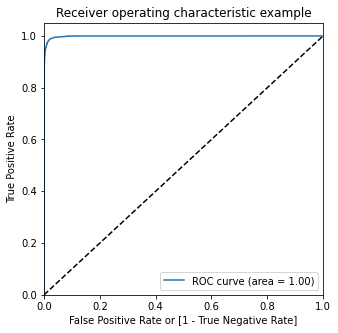

In [95]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

Model Evaluation on Test Set

In [97]:
# Predictions on the test set
y_test_pred = xgb_smote_model.predict(X_test.values)

In [98]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56153   707]
 [   11    91]]


In [99]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [100]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9873951055089358
Sensitivity:- 0.8921568627450981
Specificity:- 0.9875659514597256
F1-Score:- 0.2022222222222222


In [101]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56860
           1       0.11      0.89      0.20       102

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.60     56962
weighted avg       1.00      0.99      0.99     56962



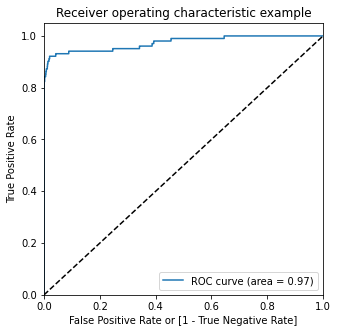

In [103]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test.values)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### **Model Summary**

Best Parameters:
```
{'learning_rate': 0.6, 'subsample': 0.9}
```

**Train Set**
- Accuracy:- 0.98
- Sensitivity:- 0.97
- Specificity:- 0.99
- F1 Score:- 0.98
- ROC : 1.0


**Test Set**
- Accuracy:- 0.99
- Sensitivity:- 0.89
- Specificity:- 0.99
- F1-Score:- 0.20
- ROC: 0.97

##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)